In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import ast
import math

In [2]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [149]:
# web app
# form to input and come up with output 
# save model as asset in proj folder and load

In [150]:
# forecasting
# stage of start up in next funding round will company even have funding round? - yes or no 
# linear regression amt of funding predited to get company into next round e.g. preseed etc

In [151]:
# NEWW
# modularise codes into py files

# EDA + Data Wrangling

In [3]:
df = pd.read_csv('combined (0-30k).csv')

In [4]:
df

,name,profile_type,about,location,employee,hiring_status,investor,investor_type,website,industries,...,Unnamed: 721,Unnamed: 722,Unnamed: 723,Unnamed: 724,Unnamed: 725,Unnamed: 726,Unnamed: 727,Unnamed: 728,Unnamed: 729,Unnamed: 730
0,softbank,INVESTMENT FIRM,"['SoftBank provides fixed-line, mobile telepho...","Tokyo, Tokyo, Japan",10001+,NaN,Investment Bank,['Investment Bank'],global.softbank,"['Banking', 'Internet', 'Mobile', 'Telecommuni...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,apollo-global-management-llc,INVESTMENT FIRM,['Apollo Global Management is an asset managem...,"New York, New York, United States",1001-5000,NaN,Private Equity Firm,['Private Equity Firm'],www.apollo.com,"['Asset Management', 'Credit', 'Finance', 'Fin...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,square,ORGANIZATION,['Square is a merchant services aggregator and...,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,NaN,squareup.com,"['FinTech', 'Hardware', 'Mobile Payments', 'Pa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ant-group,ORGANIZATION,['Ant Group strives to enable all consumers an...,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,NaN,www.antgroup.com/,"['Banking', 'Financial Services', 'FinTech', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,citigroup,INVESTMENT FIRM,['Citigroup is a diversified financial service...,"New York, New York, United States",10001+,NaN,Investment Bank,['Investment Bank'],www.citigroup.com,"['Banking', 'Credit Cards', 'Financial Service...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29523,investcloud,ORGANIZATION,['InvestCloud is a global company specializing...,"West Hollywood, California, United States",251-500,NaN,NaN,NaN,www.investcloud.com,"['Cloud Management', 'Financial Services', 'Fi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29524,velosbio-inc,ORGANIZATION,['VelosBio is a next-generation oncology compa...,"San Diego, California, United States",1-Oct,NaN,NaN,NaN,www.velosbio.com/,"['Biotechnology', 'Health Care', 'Medical']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29525,edgewise-therapeutics,ORGANIZATION,['Edgewise Therapeutics is a clinical-stage bi...,"Boulder, Colorado, United States",Nov-50,NaN,NaN,NaN,www.edgewisetx.com/,"['Biopharma', 'Biotechnology', 'Health Care']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29526,infiniscene,ORGANIZATION,['Lightstream is a powerful & intuitive live s...,"Chicago, Illinois, United States",Nov-50,NaN,NaN,NaN,www.golightstream.com/,"['Video', 'Video Games', 'Video Streaming']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['profile_type'].value_counts()

ORGANIZATION       28824
INVESTMENT FIRM      516
SCHOOL                16
Name: profile_type, dtype: int64

In [6]:
df = df[df['profile_type']=="ORGANIZATION"]

In [7]:
df['profile_type'].value_counts()

ORGANIZATION    28824
Name: profile_type, dtype: int64

In [8]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [9]:
df.columns

Index(['name', 'profile_type', 'about', 'location', 'employee',
       'hiring_status', 'investor', 'investor_type', 'website', 'industries',
       'founded_date', 'closed_date', 'founders', 'operating_status',
       'last_funding_type', 'stock_symbol', 'headquarters_regions',
       'related_hubs', 'company_type', 'ipo_status', 'hub_tags',
       'product_downloads', 'investment_stage', 'number_of_funding_rounds',
       'number_of_lead_investors', 'number_of_investors', 'funds_raised',
       'number_of_funds', 'total_funding_amount', 'ipo_date',
       'total_fund_raised', 'number_of_investments',
       'number_of_lead_investments', 'number_of_diversity_investments',
       'number_of_acquisitions', 'number_of_exits',
       'number_of_board_member_and_advisor_profiles',
       'number_of_employee_profiles', 'total_products_active',
       'monthly_visits', 'monthly_visits_growth', 'active_tech_count',
       'number_of_articles', 'number_of_events', 'valuation_at_ipo',
       'm

In [10]:
df['last_funding_type'].unique()

array(["['Post-IPO Equity']", "['Series C']",
       "['Venture - Series Unknown']", "['Corporate Round']",
       "['Series D']", "['Post-IPO Debt']", "['Series B']",
       "['Series H']", "['Private Equity']", "['Series E']",
       "['Series F']", "['Convertible Note']", "['Series A']",
       "['Debt Financing']", "['Secondary Market']", "['Series G']",
       "['Undisclosed']", "['Seed']", "['Equity Crowdfunding']",
       "['Post-IPO Secondary']", "['Initial Coin Offering']",
       "['Series J']", "['Grant']", nan, "['Non-equity Assistance']",
       "['Product Crowdfunding']", "['Pre-Seed']", "['Series I']",
       "['Angel']", 'Venture - Series Unknown', 'Initial Coin Offering',
       'Private Equity', 'Series A'], dtype=object)

In [11]:
df['last_funding_type'].value_counts()

['Series A']                    4966
['Venture - Series Unknown']    4919
['Seed']                        4878
['Series B']                    3205
['Series C']                    1660
['Post-IPO Equity']             1439
['Debt Financing']              1144
['Private Equity']              1125
['Series D']                     809
['Grant']                        605
['Post-IPO Debt']                497
['Corporate Round']              476
['Pre-Seed']                     435
['Convertible Note']             429
['Series E']                     362
['Undisclosed']                  360
['Secondary Market']             236
['Equity Crowdfunding']          214
['Non-equity Assistance']        173
['Initial Coin Offering']        154
['Angel']                        137
['Series F']                     131
['Post-IPO Secondary']            70
['Series G']                      53
['Product Crowdfunding']          28
['Series H']                      18
['Series I']                       4
[

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28824 entries, 2 to 29527
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   name                                         28823 non-null  object 
 1   profile_type                                 28824 non-null  object 
 2   about                                        28824 non-null  object 
 3   location                                     28779 non-null  object 
 4   employee                                     28675 non-null  object 
 5   hiring_status                                3686 non-null   object 
 6   investor                                     0 non-null      object 
 7   investor_type                                243 non-null    object 
 8   website                                      28757 non-null  object 
 9   industries                                   28598 non-null  object 
 10

In [160]:
def nan_eda(df):
    total_null = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_null, percent], axis=1, keys=['Total NaNs', 'Percent of NaNs'])
    return missing_data

In [161]:
nan_eda(df)

,Total NaNs,Percent of NaNs
investor,28824,1.000000
funds_raised,28824,1.000000
product_downloads,28824,1.000000
delisted_date,28792,0.998890
investment_stage,28698,0.995629
total_fund_raised,28648,0.993894
number_of_funds,28620,0.992923
investor_type,28581,0.991570
closed_date,28580,0.991535
related_hubs,28421,0.986019


In [162]:
# dropping not useful cols using contextual info - dont drop here drop at feat selec step
df.drop(['name', 'profile_type', 'website', 'about', 'investor', 'funds_raised', 'product_downloads', 
         'founded_date', 'closed_date', 'founders', 'delisted_date',
         'stock_symbol', 'headquarters_regions', 'ipo_date', 'sub-organization_of',
         'acquired_by', 'announced_date', 'number_of_exits'], axis=1, inplace=True)

In [163]:
# drop those with high percentage of NaNs
nan_eda(df)

,Total NaNs,Percent of NaNs
investment_stage,28698,0.995629
total_fund_raised,28648,0.993894
number_of_funds,28620,0.992923
investor_type,28581,0.991570
related_hubs,28421,0.986019
number_of_diversity_investments,28373,0.984353
valuation_at_ipo,27843,0.965966
number_of_lead_investments,27730,0.962046
ipo_share_price,27578,0.956772
price,27493,0.953823


In [164]:
df.dropna(how="all", inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1, inplace=True)

In [165]:
df

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,active_tech_count,number_of_articles,number_of_events,valuation_at_ipo,money_raised_at_ipo,last_funding,ipo_share_price,downloads_last_30_days,price,diversity_spotlight_(us_only)
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,"['FinTech', 'Hardware', 'Mobile Payments', 'Pa...",['Active'],['Post-IPO Equity'],['Square Alumni Founded Companies'],['For Profit'],Public,...,30.0,"7,867",22.0,$2.9B,$243M,Post-IPO Equity,$9.00,"373,621",NaN,NaN
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,"['Banking', 'Financial Services', 'FinTech', '...",['Active'],['Series C'],['Ant Group Portfolio Companies'],['For Profit'],Private,...,13.0,"2,457",8.0,NaN,NaN,Series C,NaN,NaN,NaN,NaN
2,"San Francisco, California, United States",1001-5000,NaN,NaN,"['Enterprise Software', 'Messaging', 'Mobile A...",['Active'],['Post-IPO Equity'],['Twilio Alumni Founded Companies'],['For Profit'],Public,...,61.0,"2,751",97.0,$2B,$150M,Post-IPO Equity,$23.99,NaN,NaN,NaN
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,"['Collaboration', 'Information Technology', 'M...",['Active'],['Post-IPO Equity'],NaN,['For Profit'],Public,...,90.0,"3,326",42.0,$9.2B,$751M,Post-IPO Equity,$36.00,"29,619,410",NaN,NaN
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,"['Artificial Intelligence', 'GPU', 'Hardware',...",['Active'],['Post-IPO Equity'],"['NVIDIA Alumni Founded Companies, Nvidia Port...",['For Profit'],Public,...,128.0,"13,619",132.0,NaN,NaN,Post-IPO Equity,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,"West Hollywood, California, United States",251-500,NaN,NaN,"['Cloud Management', 'Financial Services', 'Fi...",['Active'],['Private Equity'],NaN,['For Profit'],Private,...,51.0,51,28.0,NaN,NaN,Private Equity,NaN,NaN,NaN,"['Hispanic / Latinx Founded', 'Women Founded']"
28820,"San Diego, California, United States",1-Oct,NaN,NaN,"['Biotechnology', 'Health Care', 'Medical']",['Active'],['Series B'],NaN,['For Profit'],Private,...,24.0,16,NaN,NaN,NaN,Series B,NaN,NaN,['$2.8B'],NaN
28821,"Boulder, Colorado, United States",Nov-50,NaN,NaN,"['Biopharma', 'Biotechnology', 'Health Care']",['Active'],['Series C'],NaN,['For Profit'],Public,...,35.0,3,NaN,$761.1M,$176M,Series C,$16.00,NaN,NaN,NaN
28822,"Chicago, Illinois, United States",Nov-50,NaN,NaN,"['Video', 'Video Games', 'Video Streaming']",['Active'],['Series A'],NaN,['For Profit'],Private,...,72.0,21,5.0,NaN,NaN,Series A,NaN,NaN,NaN,NaN


## Formatting columns

In [166]:
# # indexes with col names as values
# pos = [4999, 9365, 19071]
# df.drop(df.index[pos], inplace=True)
# df.reset_index(inplace=True)
# df.drop(['index'],axis=1, inplace=True)

In [167]:
def unlist_cat_cols_kmeans(df, listed_cat_cols_kmeans):    
    for i in listed_cat_cols_kmeans:
        df[i] = df[i].apply(lambda x: " ".join(ast.literal_eval(x)) if x is not np.nan else np.nan)
        #df[i] = df[i].apply(lambda x: " ".join(a for a in x) if x is not np.nan else np.nan)

In [168]:
unlist_cat_cols_kmeans(df, ['industries', 'related_hubs', 'hub_tags', 
                            'diversity_spotlight_(us_only)', 'price', 'investment_stage'])

In [169]:
def unlist_cat_cols_special(df, cat_cols_special):
    l = ['Active', 'Closed', 'Private Equity', 'Venture - Series Unknown', 'Initial Coin Offering', 'Series A']
    for i in cat_cols_special:
        for j in range(len(df)):
            if df[i][j] is not np.nan:
                if df[i][j] in l:
                    continue
                else:
                    df[i][j] = "".join(ast.literal_eval(df[i][j]))

In [170]:
unlist_cat_cols_special(df, ['operating_status', 'last_funding_type'])

In [171]:
def unlist_company_type(df, company_type):
    l = ['Active', 'Closed', 'Private Equity', 'Venture - Series Unknown', 'Initial Coin Offering', 'Series A']
    for j in range(len(df)):
        if df[company_type][j] is not np.nan:
            if df[company_type][j] == "['For Profit']":
                df[company_type][j] = 'For Profit'
            elif df[company_type][j] == "['Non-profit']":
                df[company_type][j] = 'Non Profit'
            elif df[company_type][j] == "'For Profit']":
                df[company_type][j] = 'For Profit'  

In [172]:
unlist_company_type(df, 'company_type')

In [173]:
# TBC
currencies = {'£':1.42, '€':1.22, '₹':0.014, 'CN¥':0.16, 'ZAR':0.071, 'CA$':0.83, 'BDT':0.012, 
              'SEK':0.12, 'CHF':1.11, 'A$':0.77, '¥':0.0091, 'DKK':0.16, '₩':0.00090, 'R$':0.20,
             'AED':0.27, 'HK$':0.13, '₪':0.31, 'SGD':0.75, 'PLN':0.27, 'RUB':0.014, 'NGN':0.0024, 
              'THB':0.032, 'NOK':0.12, 'NT$':0.03616,
             'QAR':0.27, 'MX$': 0.050, 'NZ$':0.71, 'IDR':0.000070, 'KES':0.0093, 'MYR':0.24, 
              'PHP':0.021, '₫':0.00004, 'ISK':0.0082, 'KWD':3.33,
             'TRY':0.12, 'SAR':0.27, 'HRK':0.16, }

def currency_to_usd(df, list_of_other_currency_cols):
    for i in list_of_other_currency_cols:
        for j in range(len(df)):
            if df[i][j] is not np.nan:
                if isinstance(df[i][j], str):
                    if ',' in df[i][j]:
                        df[i][j] = df[i][j].replace(',','')

                    if "[" in df[i][j]:
                        df[i][j] = "".join(ast.literal_eval(df[i][j]))

                    if df[i][j][0] == '$': 
                        print("yes")
                        df[i][j] = df[i][j][1:]

                    elif df[i][j][1].isdigit():
                        value = str(float(df[i][j][1:-1])*currencies.get(df[i][j][0]))
                        df[i][j] = value+df[i][j][-1]

                    elif df[i][j][2].isdigit():
                        value = str(float(df[i][j][2:-1])*currencies.get(df[i][j][0:2]))
                        df[i][j] = value+df[i][j][-1]

                    elif df[i][j][3].isdigit():
                        value = str(float(df[i][j][3:-1])*currencies.get(df[i][j][0:3]))
                        df[i][j] = value+df[i][j][-1]

                    elif df[i][j][0:3] == "['$":  
                        df[i][j] =  df[i][j][3:]

                    elif df[i][j][0:3] == "['£":
                        df[i][j] =  float(df[i][j][3:])*1.42
                else:
                    df[i][j] =  float(df[i][j])

In [174]:
#TBC
currency_to_usd(df, ['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo', 'price'])

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [175]:
# # code to check diff types of currencies in data, DO NOT run this cell after running prev cell will get error
# currencies = {'£':1.42, '€':1.22, '₹':0.014, 'CN¥':0.16, 'ZAR':0.071, 'CA$':0.83, 'BDT':0.012, 
#               'SEK':0.12, 'CHF':1.11, 'A$':0.77, '¥':0.0091, 'DKK':0.16, '₩':0.00090, 'R$':0.20,
#              'AED':0.27, 'HK$':0.13, '₪':0.31, 'SGD':0.75, 'PLN':0.27, 'RUB':0.014, 'NGN':0.0024, 
#               'THB':0.032, 'NOK':0.12, 'NT$':0.03616,
#              'QAR':0.27, 'MX$': 0.050, 'NZ$':0.71, 'IDR':0.000070, 'KES':0.0093, 'MYR':0.24, 
#               'PHP':0.021, '₫':0.00004, 'ISK':0.0082, 'KWD':3.33,
#              'TRY':0.12, 'SAR':0.27, 'HRK':0.16, }
# list_of_other_currency_cols=['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo', 
#                      'price', 'ipo_share_price']
# others = ['$']
# for i in list_of_other_currency_cols:
#     for j in range(len(df)):
#         if df[i][j] is not np.nan:
            
#             if df[i][j][1].isdigit():
#                 if df[i][j][0] not in currencies.keys():
#                     if df[i][j][0] not in others:
#                         others.append(df[i][j][0])
                        
#             elif df[i][j][2].isdigit():            
#                 if df[i][j][0:2] not in currencies.keys():
#                     if df[i][j][0:2] not in others:
#                         others.append(df[i][j][0:2])
                        
#             elif df[i][j][3].isdigit():            
#                 if df[i][j][0:3] not in currencies.keys():
#                     if df[i][j][0:3] not in others:
#                         others.append(df[i][j][0:3])
#             elif df[i][j][0:3] == "['$":  
#                     continue
                    
#             elif df[i][j][0:3] == "['£":
            
#             else:
                
#                 continue

In [176]:
# others

In [177]:
# assuming all values are in billion, million or NAN
def remove_TBMK(df, list_of_TBMK_cols):
    for i in list_of_TBMK_cols:
        for j in range(len(df)):
            if df[i][j] is not np.nan:
                if df[i][j][-1] == 'B':
                    df[i][j] = float(df[i][j][:-1])*1000000000
                elif df[i][j][-1] == 'M':
                    df[i][j] = float(df[i][j][:-1])*1000000
                elif df[i][j][-1] == 'K':
                    df[i][j] = float(df[i][j][:-1])*100000
                elif df[i][j][-1]=='T':
                    df[i][j] = float(df[i][j][:-1])*1000000000000

In [178]:
remove_TBMK(df, ['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo',
                 'price'])

In [179]:
def remove_commas_numeric(df, list_of_numeric_cols_w_comma):
    for i in list_of_numeric_cols_w_comma:
        df[i] = df[i].apply(lambda x: float(x.replace(',','')) if x is not np.nan else np.nan)

In [180]:
remove_commas_numeric(df, ['monthly_visits', 'number_of_articles', 'downloads_last_30_days'])

In [181]:
def unstring_numeric(df, list_of_string_numeric_cols):
    for i in list_of_string_numeric_cols:
        df[i] = df[i].apply(lambda x: float(str(x).replace(',','')) if x is not np.nan else np.nan)

In [182]:
# number_of_investments
unstring_numeric(df, ['number_of_funding_rounds', 'number_of_lead_investors', 'number_of_investors',
                     'number_of_funds', 'number_of_investments', 'number_of_lead_investments', 
                     'number_of_diversity_investments', 'number_of_acquisitions', 
                      'number_of_board_member_and_advisor_profiles', 'number_of_employee_profiles',
                     'total_products_active', 'active_tech_count', 'number_of_events'])

In [809]:
# def unstring_unlist_numeric(df, list_of_string_numeric_cols):
#     for i in list_of_string_numeric_cols:
#         for j in range(len(df)):
#             if df[i][j] is not np.nan:
#                 if "[" in df[i][j]:
#                     df[i][j] = float("".join(ast.literal_eval(df[i][j])))
#                 else:
#                     df[i][j] = float(df[i][j])

In [810]:
# unstring_unlist_numeric(df, ['number_of_exits'])

In [183]:
df['monthly_visits_growth'] = df['monthly_visits_growth'].apply(lambda x: float(x.replace(',', '').replace('%', ''))*100 if x is not np.nan else np.nan)

In [184]:
df.head()

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,active_tech_count,number_of_articles,number_of_events,valuation_at_ipo,money_raised_at_ipo,last_funding,ipo_share_price,downloads_last_30_days,price,diversity_spotlight_(us_only)
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,30.0,7867.0,22.0,2900000000.0,243000000.0,Post-IPO Equity,$9.00,373621.0,NaN,NaN
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,13.0,2457.0,8.0,NaN,NaN,Series C,NaN,NaN,NaN,NaN
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,61.0,2751.0,97.0,2000000000.0,150000000.0,Post-IPO Equity,$23.99,NaN,NaN,NaN
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,90.0,3326.0,42.0,9200000000.0,751000000.0,Post-IPO Equity,$36.00,29619410.0,NaN,NaN
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,128.0,13619.0,132.0,NaN,NaN,Post-IPO Equity,NaN,NaN,NaN,NaN


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28824 entries, 0 to 28823
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   location                                     28779 non-null  object 
 1   employee                                     28675 non-null  object 
 2   hiring_status                                3686 non-null   object 
 3   investor_type                                243 non-null    object 
 4   industries                                   28598 non-null  object 
 5   operating_status                             28820 non-null  object 
 6   last_funding_type                            28534 non-null  object 
 7   related_hubs                                 403 non-null    object 
 8   company_type                                 28030 non-null  object 
 9   ipo_status                                   28824 non-null  object 
 10

In [186]:
# dropping not useful cols using contextual info - dont drop here drop at feat selec step
df.drop(['ipo_share_price'], axis=1, inplace=True)

## Feature Engineering

In [814]:
# Unicorn + Pledge 1% Unicorn [value >= $1B]
# Exited Unicorn + Exited Unicorn, Pledge 1% + Crunchbase Venture Program, Exited Unicorn [value >= $1B, public or acq]
# Emerging Unicorn + Emerging Unicorn, Pledge 1% [$1B >= value >= $500M]

# others: Crunchbase Venture Program + Crunchbase Venture Program, Pledge 1% + Pledge 1%

In [187]:
def hub_tag_cat(hub_tag):
    tags = {'Unicorn':['Unicorn', 'Pledge 1%, Unicorn'], 
            'Exited Unicorn': ['Exited Unicorn', 'Exited Unicorn, Pledge 1%', 'Crunchbase Venture Program, Exited Unicorn'], 
            'Emerging Unicorn': ['Emerging Unicorn', 'Emerging Unicorn, Pledge 1%'], 
            'Others': ['Crunchbase Venture Program', 'Crunchbase Venture Program, Pledge 1%', 'Pledge 1%']}
    
    if hub_tag is not np.nan:
        for k, v in tags.items():
            if hub_tag in v:
                return k
        return k
    else:
        return np.nan

In [188]:
df['hub_tags_cat'] = df['hub_tags'].apply(lambda x: hub_tag_cat(x))

In [189]:
df['location_country'] = df['location'].apply(lambda x: str(x).split(",")[-1].lstrip())

In [190]:
df['location_city'] = df['location'].apply(lambda x: str(x).split(",")[0].lstrip())

In [191]:
df['location_city'].unique()

array(['San Francisco', 'Hangzhou', 'San Jose', ..., 'Coventry', 'Morges',
       'Hyannis Port'], dtype=object)

In [192]:
# https://thenextweb.com/news/top-7-startup-cities-keep-their-ranking-in-2020-but-new-players-are-on-the-rise
def location_city_in_startup_cluster(df):
    # top 20 most prominent startup locations
    top_20_startup_locations = ['Silicon Valley', 'New York', 'London', 'Beijing', 'Boston',
                        'Tel Aviv', 'Los Angeles', 'Shanghai', 'Seattle', 'Stockholm',
                        'Washington DC', 'Amsterdam', 'Paris', 'Chicago', 'Tokyo',
                        'Berlin', 'Singapore', 'Toronto-Waterloo', 'Austin', 'Seoul']
    
    df['in_startup_cluster'] = df['location_city'].apply(lambda x: 1 if x in top_20_startup_locations else 0) 

In [193]:
location_city_in_startup_cluster(df)

In [194]:
df


,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,valuation_at_ipo,money_raised_at_ipo,last_funding,downloads_last_30_days,price,diversity_spotlight_(us_only),hub_tags_cat,location_country,location_city,in_startup_cluster
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,2900000000.0,243000000.0,Post-IPO Equity,373621.0,NaN,NaN,Exited Unicorn,United States,San Francisco,0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,NaN,NaN,Series C,NaN,NaN,NaN,Unicorn,China,Hangzhou,0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,2000000000.0,150000000.0,Post-IPO Equity,NaN,NaN,NaN,Exited Unicorn,United States,San Francisco,0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,9200000000.0,751000000.0,Post-IPO Equity,29619410.0,NaN,NaN,Exited Unicorn,United States,San Jose,0
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,NaN,NaN,Post-IPO Equity,NaN,NaN,NaN,NaN,United States,Santa Clara,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,"West Hollywood, California, United States",251-500,NaN,NaN,Cloud Management Financial Services FinTech Ou...,Active,Private Equity,NaN,For Profit,Private,...,NaN,NaN,Private Equity,NaN,NaN,Hispanic / Latinx Founded Women Founded,NaN,United States,West Hollywood,0
28820,"San Diego, California, United States",1-Oct,NaN,NaN,Biotechnology Health Care Medical,Active,Series B,NaN,For Profit,Private,...,NaN,NaN,Series B,NaN,2800000000.0,NaN,NaN,United States,San Diego,0
28821,"Boulder, Colorado, United States",Nov-50,NaN,NaN,Biopharma Biotechnology Health Care,Active,Series C,NaN,For Profit,Public,...,761100000.0,176000000.0,Series C,NaN,NaN,NaN,NaN,United States,Boulder,0
28822,"Chicago, Illinois, United States",Nov-50,NaN,NaN,Video Video Games Video Streaming,Active,Series A,NaN,For Profit,Private,...,NaN,NaN,Series A,NaN,NaN,NaN,NaN,United States,Chicago,1


In [195]:
ind = df[['industries']]
ind.dropna(inplace=True)

In [196]:
ind

,industries
0,FinTech Hardware Mobile Payments Payments
1,Banking Financial Services FinTech Payments
2,Enterprise Software Messaging Mobile Apps SMS ...
3,Collaboration Information Technology Messaging...
4,Artificial Intelligence GPU Hardware Software ...
...,...
28819,Cloud Management Financial Services FinTech Ou...
28820,Biotechnology Health Care Medical
28821,Biopharma Biotechnology Health Care
28822,Video Video Games Video Streaming


In [197]:
hubs = df[['related_hubs']]
hubs.dropna(inplace=True)

In [198]:
hubs

,related_hubs
0,Square Alumni Founded Companies
1,Ant Group Portfolio Companies
2,Twilio Alumni Founded Companies
4,"NVIDIA Alumni Founded Companies, Nvidia Portfo..."
6,OurCrowd Portfolio Companies
...,...
27794,Capgemini Alumni Founded Companies
27861,"Vodafone Alumni Founded Companies, Vodafone Po..."
27917,"Eli Lilly Alumni Founded Companies, Eli Lilly ..."
28439,Good Technology Alumni Founded Companies


In [199]:
class Kmeans: # run after removing NANs from industry col
    """ 
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        self.centroids = None
        self.cluster_labels = None
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        Returns
        -------
        instance of kmeans class
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for i in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if i % 100 == 0:
                print("Running Model Iteration %d " %i)
        print("Model finished running")
        return self

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
#create tfidf array based on unique industries
def create_tfidf_array(data):
    
    tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                                 max_features = 20000)
    tf_idf = tf_idf_vectorizor.fit_transform(data)
    tf_idf_norm = normalize(tf_idf)
    tf_idf_array = tf_idf_norm.toarray()
    
    return tf_idf_array

In [201]:
from sklearn.cluster import KMeans
def dim_reduction(data):
    
    tf_idf_array = create_tfidf_array(data)
    sklearn_pca = PCA(n_components = 2)
    reduced_dim = sklearn_pca.fit_transform(tf_idf_array)
    
    return reduced_dim
#     kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
#     fitted = kmeans.fit(Y_sklearn)
#     prediction = kmeans.predict(Y_sklearn)

In [202]:
def elbow_plot(data, start, end):
    
    #tf_idf_array = create_tfidf_array(data)
    reduced_dim = dim_reduction(data)
    
    number_clusters = range(start, end)
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]

    score = [kmeans[i].fit(reduced_dim).score(reduced_dim) for i in range(len(kmeans))]

    plt.plot(number_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Method')
    plt.show()

#from plot ideal number of clusters appears to be 3

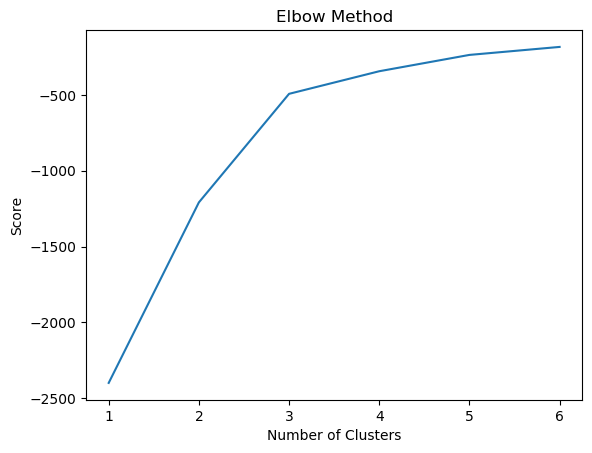

In [203]:
elbow_plot(ind['industries'], 1, 7)

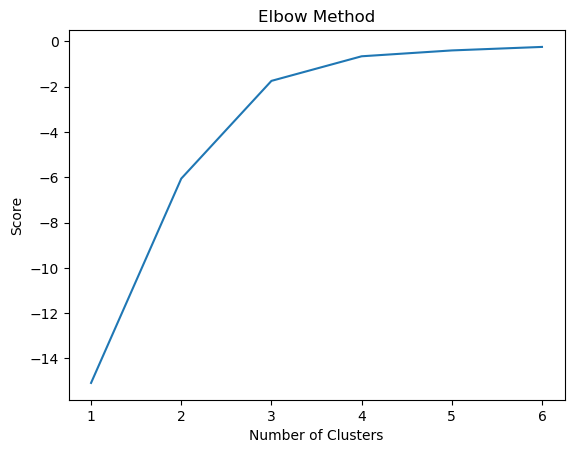

In [204]:
elbow_plot(hubs['related_hubs'], 1, 7)

In [205]:
from sklearn.metrics import pairwise_distances

def test_fit_and_predict(clusters, seed, iterations, data):
    #tfidf_array = create_tfidf_array(data)
    Y_sklearn = dim_reduction(data)
    
#     sklearn_pca = PCA(n_components = 2)
#     Y_sklearn = sklearn_pca.fit_transform(tfidf_array)

    kmeans_test = Kmeans(clusters, seed, iterations)
    fitted = kmeans_test.fit_kmeans(Y_sklearn)
    predicted_values = kmeans_test.predict(Y_sklearn)

    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

    centers = fitted.centroids
    plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)
    
    return predicted_values

#     kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
#     fitted = kmeans.fit(Y_sklearn)
#     prediction = kmeans.predict(Y_sklearn)

In [206]:
predicted_values_industry = test_fit_and_predict(3, 1, 200, ind['industries'])

Running Model Iteration 0 
Running Model Iteration 100 
Model finished running


In [207]:
len(predicted_values_industry)

28598

In [208]:
ind_pred = pd.concat([ind['industries'], pd.Series(predicted_values_industry, index=ind.index)], axis=1)

In [209]:
ind_pred

,industries,0
0,FinTech Hardware Mobile Payments Payments,2
1,Banking Financial Services FinTech Payments,2
2,Enterprise Software Messaging Mobile Apps SMS ...,0
3,Collaboration Information Technology Messaging...,0
4,Artificial Intelligence GPU Hardware Software ...,0
...,...,...
28819,Cloud Management Financial Services FinTech Ou...,2
28820,Biotechnology Health Care Medical,1
28821,Biopharma Biotechnology Health Care,1
28822,Video Video Games Video Streaming,0


In [210]:
predicted_values_hubs = test_fit_and_predict(3, 1, 200, hubs['related_hubs'])

Running Model Iteration 0 
Running Model Iteration 100 
Model finished running


In [211]:
len(predicted_values_hubs)

403

In [212]:
hubs_pred = pd.concat([hubs['related_hubs'], pd.Series(predicted_values_hubs, index=hubs.index)], axis=1)

In [213]:
hubs_pred

,related_hubs,0
0,Square Alumni Founded Companies,1
1,Ant Group Portfolio Companies,2
2,Twilio Alumni Founded Companies,1
4,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",0
6,OurCrowd Portfolio Companies,0
...,...,...
27794,Capgemini Alumni Founded Companies,1
27861,"Vodafone Alumni Founded Companies, Vodafone Po...",0
27917,"Eli Lilly Alumni Founded Companies, Eli Lilly ...",0
28439,Good Technology Alumni Founded Companies,1


In [214]:
hubs_pred_ohe = pd.get_dummies(hubs_pred[0], prefix='type')
hubs_pred_ohe

,type_0,type_1,type_2
0,0,1,0
1,0,0,1
2,0,1,0
4,1,0,0
6,1,0,0
...,...,...,...
27794,0,1,0
27861,1,0,0
27917,1,0,0
28439,0,1,0


In [220]:
hubs_pred_ohe.columns = ['related_hubs_type_0', 'related_hubs_type_1', 'related_hubs_type_2']

In [221]:
hubs_pred_ohe

,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2
0,0,1,0
1,0,0,1
2,0,1,0
4,1,0,0
6,1,0,0
...,...,...,...
27794,0,1,0
27861,1,0,0
27917,1,0,0
28439,0,1,0


In [222]:
ind_pred_ohe = pd.get_dummies(ind_pred[0], prefix='type')
ind_pred_ohe

,type_0,type_1,type_2
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
28819,0,0,1
28820,0,1,0
28821,0,1,0
28822,1,0,0


In [223]:
ind_pred_ohe.columns = ['industries_type_0', 'industries_type_1', 'industries_type_2']

In [224]:
df_merged = df.merge(ind_pred_ohe, how='outer', left_index=True, right_index=True)

In [225]:
df_merged

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,downloads_last_30_days,price,diversity_spotlight_(us_only),hub_tags_cat,location_country,location_city,in_startup_cluster,industries_type_0,industries_type_1,industries_type_2
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,373621.0,NaN,NaN,Exited Unicorn,United States,San Francisco,0,0.0,0.0,1.0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,NaN,NaN,NaN,Unicorn,China,Hangzhou,0,0.0,0.0,1.0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,NaN,NaN,NaN,Exited Unicorn,United States,San Francisco,0,1.0,0.0,0.0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,29619410.0,NaN,NaN,Exited Unicorn,United States,San Jose,0,1.0,0.0,0.0
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,NaN,NaN,NaN,NaN,United States,Santa Clara,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,"West Hollywood, California, United States",251-500,NaN,NaN,Cloud Management Financial Services FinTech Ou...,Active,Private Equity,NaN,For Profit,Private,...,NaN,NaN,Hispanic / Latinx Founded Women Founded,NaN,United States,West Hollywood,0,0.0,0.0,1.0
28820,"San Diego, California, United States",1-Oct,NaN,NaN,Biotechnology Health Care Medical,Active,Series B,NaN,For Profit,Private,...,NaN,2800000000.0,NaN,NaN,United States,San Diego,0,0.0,1.0,0.0
28821,"Boulder, Colorado, United States",Nov-50,NaN,NaN,Biopharma Biotechnology Health Care,Active,Series C,NaN,For Profit,Public,...,NaN,NaN,NaN,NaN,United States,Boulder,0,0.0,1.0,0.0
28822,"Chicago, Illinois, United States",Nov-50,NaN,NaN,Video Video Games Video Streaming,Active,Series A,NaN,For Profit,Private,...,NaN,NaN,NaN,NaN,United States,Chicago,1,1.0,0.0,0.0


In [226]:
df_merged['industries_type_0'].unique()

array([ 0.,  1., nan])

In [227]:
df_merged2 = df_merged.merge(hubs_pred_ohe, how='outer', left_index=True, right_index=True)

In [228]:
df_merged2

,location,employee,hiring_status,investor_type,industries,operating_status,last_funding_type,related_hubs,company_type,ipo_status,...,hub_tags_cat,location_country,location_city,in_startup_cluster,industries_type_0,industries_type_1,industries_type_2,related_hubs_type_0,related_hubs_type_1,related_hubs_type_2
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Post-IPO Equity,Square Alumni Founded Companies,For Profit,Public,...,Exited Unicorn,United States,San Francisco,0,0.0,0.0,1.0,0.0,1.0,0.0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Series C,Ant Group Portfolio Companies,For Profit,Private,...,Unicorn,China,Hangzhou,0,0.0,0.0,1.0,0.0,0.0,1.0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Post-IPO Equity,Twilio Alumni Founded Companies,For Profit,Public,...,Exited Unicorn,United States,San Francisco,0,1.0,0.0,0.0,0.0,1.0,0.0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,Post-IPO Equity,NaN,For Profit,Public,...,Exited Unicorn,United States,San Jose,0,1.0,0.0,0.0,NaN,NaN,NaN
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,Post-IPO Equity,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,Public,...,NaN,United States,Santa Clara,0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,"West Hollywood, California, United States",251-500,NaN,NaN,Cloud Management Financial Services FinTech Ou...,Active,Private Equity,NaN,For Profit,Private,...,NaN,United States,West Hollywood,0,0.0,0.0,1.0,NaN,NaN,NaN
28820,"San Diego, California, United States",1-Oct,NaN,NaN,Biotechnology Health Care Medical,Active,Series B,NaN,For Profit,Private,...,NaN,United States,San Diego,0,0.0,1.0,0.0,NaN,NaN,NaN
28821,"Boulder, Colorado, United States",Nov-50,NaN,NaN,Biopharma Biotechnology Health Care,Active,Series C,NaN,For Profit,Public,...,NaN,United States,Boulder,0,0.0,1.0,0.0,NaN,NaN,NaN
28822,"Chicago, Illinois, United States",Nov-50,NaN,NaN,Video Video Games Video Streaming,Active,Series A,NaN,For Profit,Private,...,NaN,United States,Chicago,1,1.0,0.0,0.0,NaN,NaN,NaN


In [229]:
df_merged2.select_dtypes(include='object').columns

Index(['location', 'employee', 'hiring_status', 'investor_type', 'industries',
       'operating_status', 'last_funding_type', 'related_hubs', 'company_type',
       'ipo_status', 'hub_tags', 'investment_stage', 'total_funding_amount',
       'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo',
       'last_funding', 'price', 'diversity_spotlight_(us_only)',
       'hub_tags_cat', 'location_country', 'location_city'],
      dtype='object')

In [230]:
def hub_tags_to_ohe(df):
    ohe_types = pd.get_dummies(df['hub_tags_cat'], prefix='type')
    new_df = pd.concat([df.drop('hub_tags_cat', axis=1), ohe_types], axis=1)
    return new_df

In [231]:
df_merged2 = hub_tags_to_ohe(df_merged2)

In [232]:
def last_fund_type_to_ohe(df):
    ohe_types = pd.get_dummies(df['last_funding_type'], prefix='type')
    new_df = pd.concat([df.drop('last_funding_type', axis=1), ohe_types], axis=1)
    return new_df

In [233]:
df_merged2 = last_fund_type_to_ohe(df_merged2)

In [234]:
def ipo_status_to_ohe(df):
    ohe_types = pd.get_dummies(df['ipo_status'], prefix='type')
    new_df = pd.concat([df.drop('ipo_status', axis=1), ohe_types], axis=1)
    return new_df

In [235]:
df_merged2 = ipo_status_to_ohe(df_merged2)

In [236]:
df_merged2

,location,employee,hiring_status,investor_type,industries,operating_status,related_hubs,company_type,hub_tags,investment_stage,...,type_Series F,type_Series G,type_Series H,type_Series I,type_Series J,type_Undisclosed,type_Venture - Series Unknown,type_Delisted,type_Private,type_Public
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Square Alumni Founded Companies,For Profit,Exited Unicorn,NaN,...,0,0,0,0,0,0,0,0,0,1
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Ant Group Portfolio Companies,For Profit,Unicorn,NaN,...,0,0,0,0,0,0,0,0,1,0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Twilio Alumni Founded Companies,For Profit,"Exited Unicorn, Pledge 1%",NaN,...,0,0,0,0,0,0,0,0,0,1
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,NaN,For Profit,Exited Unicorn,NaN,...,0,0,0,0,0,0,0,0,0,1
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",For Profit,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28819,"West Hollywood, California, United States",251-500,NaN,NaN,Cloud Management Financial Services FinTech Ou...,Active,NaN,For Profit,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
28820,"San Diego, California, United States",1-Oct,NaN,NaN,Biotechnology Health Care Medical,Active,NaN,For Profit,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
28821,"Boulder, Colorado, United States",Nov-50,NaN,NaN,Biopharma Biotechnology Health Care,Active,NaN,For Profit,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
28822,"Chicago, Illinois, United States",Nov-50,NaN,NaN,Video Video Games Video Streaming,Active,NaN,For Profit,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [237]:
def company_type_to_ohe(df):
    ohe_types = pd.get_dummies(df['company_type'], prefix='type')
    new_df = pd.concat([df.drop('company_type', axis=1), ohe_types], axis=1)
    return new_df

In [238]:
df_merged2 = company_type_to_ohe(df_merged2)

In [239]:
df["employee"].unique()

array(['1001-5000', '5001-10000', '10001+', '101-250', '501-1000',
       '251-500', 'Nov-50', '51-100', '1-Oct', nan, 'Oct-21'],
      dtype=object)

In [240]:
def employees_to_le(df):
    employees = {'1-10':1, '11-50': 2, '51-100':3, '101-250':4, '251-500':5, '501-1000':6, '1001-5000':7, 
             '5001-10000':8, '10001+':9}
    
    df['employee'] = df['employee'].apply(lambda x: x if x in employees.keys() else np.nan)
    df["employee_cat"] = df["employee"]
    df.replace({'employee_cat': employees}, inplace=True) 

In [241]:
employees_to_le(df_merged2)

In [242]:
len(df_merged2)

28824

In [243]:
df_merged2 = df_merged2[df_merged2['operating_status'].notna()]
df_merged2.reset_index(inplace=True)

In [244]:
df_merged2.drop(['index'], axis=1, inplace=True)

In [245]:
len(df_merged2)

28820

In [246]:
def opstatus_to_le(df): # target variable
    df["operating_status_cat"] = df["operating_status"].astype('category').cat.codes

In [247]:
opstatus_to_le(df_merged2)

In [248]:
df_merged2.head()

,location,employee,hiring_status,investor_type,industries,operating_status,related_hubs,hub_tags,investment_stage,number_of_funding_rounds,...,type_Series J,type_Undisclosed,type_Venture - Series Unknown,type_Delisted,type_Private,type_Public,type_For Profit,type_Non Profit,employee_cat,operating_status_cat
0,"San Francisco, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,FinTech Hardware Mobile Payments Payments,Active,Square Alumni Founded Companies,Exited Unicorn,NaN,11.0,...,0,0,0,0,0,1,1,0,7.0,0
1,"Hangzhou, Zhejiang, China",5001-10000,NaN,NaN,Banking Financial Services FinTech Payments,Active,Ant Group Portfolio Companies,Unicorn,NaN,4.0,...,0,0,0,0,1,0,1,0,8.0,0
2,"San Francisco, California, United States",1001-5000,NaN,NaN,Enterprise Software Messaging Mobile Apps SMS ...,Active,Twilio Alumni Founded Companies,"Exited Unicorn, Pledge 1%",NaN,10.0,...,0,0,0,0,0,1,1,0,7.0,0
3,"San Jose, California, United States",1001-5000,Actively Hiring - View All Jobs,NaN,Collaboration Information Technology Messaging...,Active,NaN,Exited Unicorn,NaN,7.0,...,0,0,0,0,0,1,1,0,7.0,0
4,"Santa Clara, California, United States",10001+,Actively Hiring - View All Jobs,NaN,Artificial Intelligence GPU Hardware Software ...,Active,"NVIDIA Alumni Founded Companies, Nvidia Portfo...",NaN,NaN,4.0,...,0,0,0,0,0,1,1,0,9.0,0


In [249]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 81 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   location                                     28775 non-null  object 
 1   employee                                     13259 non-null  object 
 2   hiring_status                                3685 non-null   object 
 3   investor_type                                243 non-null    object 
 4   industries                                   28598 non-null  object 
 5   operating_status                             28820 non-null  object 
 6   related_hubs                                 403 non-null    object 
 7   hub_tags                                     1407 non-null   object 
 8   investment_stage                             126 non-null    object 
 9   number_of_funding_rounds                     28328 non-null  float64
 10

In [254]:
df_merged2.drop(['location', 'employee', 'industries', 'operating_status','related_hubs', 
                 'hub_tags', 'investment_stage', 'location_country', 'location_city', 
                 'diversity_spotlight_(us_only)', 'last_funding'], axis=1, inplace=True)

In [259]:
df_merged2.drop(['hiring_status', 'investor_type'], axis=1, inplace=True)

In [260]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 68 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   number_of_funding_rounds                     28328 non-null  float64
 1   number_of_lead_investors                     23140 non-null  float64
 2   number_of_investors                          26218 non-null  float64
 3   number_of_funds                              204 non-null    float64
 4   total_funding_amount                         28268 non-null  object 
 5   total_fund_raised                            176 non-null    object 
 6   number_of_investments                        1737 non-null   float64
 7   number_of_lead_investments                   1094 non-null   float64
 8   number_of_diversity_investments              451 non-null    float64
 9   number_of_acquisitions                       5606 non-null   float64
 10

In [261]:
df_merged2

,number_of_funding_rounds,number_of_lead_investors,number_of_investors,number_of_funds,total_funding_amount,total_fund_raised,number_of_investments,number_of_lead_investments,number_of_diversity_investments,number_of_acquisitions,...,type_Series J,type_Undisclosed,type_Venture - Series Unknown,type_Delisted,type_Private,type_Public,type_For Profit,type_Non Profit,employee_cat,operating_status_cat
0,11.0,4.0,44.0,NaN,601200000.0,NaN,16.0,2.0,1.0,19.0,...,0,0,0,0,0,1,1,0,7.0,0
1,4.0,4.0,15.0,NaN,22000000000.0,NaN,103.0,57.0,NaN,5.0,...,0,0,0,0,1,0,1,0,8.0,0
2,10.0,7.0,24.0,1.0,236200000.0,50000000.0,13.0,2.0,2.0,10.0,...,0,0,0,0,0,1,1,0,7.0,0
3,7.0,4.0,18.0,1.0,146000000.0,100000000.0,3.0,1.0,NaN,1.0,...,0,0,0,0,0,1,1,0,7.0,0
4,4.0,3.0,4.0,NaN,4000000000.0,NaN,17.0,4.0,1.0,19.0,...,0,0,0,0,0,1,1,0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,4.0,2.0,5.0,NaN,54100000.0,NaN,NaN,NaN,NaN,4.0,...,0,0,0,0,1,0,1,0,5.0,0
28816,3.0,3.0,20.0,NaN,202700000.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,NaN,0
28817,3.0,3.0,15.0,NaN,160500000.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,NaN,0
28818,4.0,3.0,8.0,NaN,11400000.0,NaN,NaN,NaN,NaN,2.0,...,0,0,0,0,1,0,1,0,NaN,0


In [262]:
nan_eda(df_merged2)[nan_eda(df_merged2)['Percent of NaNs']==0]

,Total NaNs,Percent of NaNs
type_Series B,0,0.0
type_Series C,0,0.0
type_Series D,0,0.0
type_Series E,0,0.0
type_Series F,0,0.0
type_Series G,0,0.0
type_Series H,0,0.0
type_Series I,0,0.0
type_Series J,0,0.0
type_Undisclosed,0,0.0


In [879]:
# def handle_numeric_nan(df):
#     cols = ['number_of_funding_rounds', 'number_of_lead_investors', 'number_of_investors', 
#             'number_of_funds', 'total_funding_amount', 'total_fund_raised', 'number_of_investments',
#             'number_of_lead_investments', 'number_of_diversity_investments', 'number_of_acquisitions',
#             'number_of_exits', 'number_of_board_member_and_advisor_profiles','number_of_employee_profiles',
#             'total_products_active', 'monthly_visits', 'monthly_visits_growth', 'active_tech_count', 
#             'number_of_articles', 'number_of_events', 'valuation_at_ipo', 'money_raised_at_ipo',
#             'last_funding', 'ipo_share_price', 'downloads_last_30_days', 'price', 'in_startup_cluster',
#            'employee_cat', 'operating_status_cat']
#     for i in cols:
#         df[i].replace(np.nan, df[i].median(), inplace=True)

In [264]:
df_merged2['number_of_funding_rounds'].replace(np.nan, df_merged2['number_of_funding_rounds'].median(), inplace=True)
df_merged2['number_of_lead_investors'].replace(np.nan, df_merged2['number_of_lead_investors'].median(), inplace=True)
df_merged2['number_of_investors'].replace(np.nan, df_merged2['number_of_investors'].median(), inplace=True)
df_merged2['number_of_funds'].replace(np.nan, df_merged2['number_of_funds'].median(), inplace=True)
df_merged2['total_funding_amount'].replace(np.nan, df_merged2['total_funding_amount'].median(), inplace=True)
df_merged2['total_fund_raised'].replace(np.nan, df_merged2['total_fund_raised'].median(), inplace=True)
df_merged2['number_of_investments'].replace(np.nan, df_merged2['number_of_investments'].median(), inplace=True)
df_merged2['number_of_lead_investments'].replace(np.nan, df_merged2['number_of_lead_investments'].median(), inplace=True)
df_merged2['number_of_diversity_investments'].replace(np.nan, df_merged2['number_of_diversity_investments'].median(), inplace=True)
df_merged2['number_of_acquisitions'].replace(np.nan, df_merged2['number_of_acquisitions'].median(), inplace=True)

df_merged2['number_of_board_member_and_advisor_profiles'].replace(np.nan, df_merged2['number_of_board_member_and_advisor_profiles'].median(), inplace=True)
df_merged2['number_of_employee_profiles'].replace(np.nan, df_merged2['number_of_employee_profiles'].median(), inplace=True)
df_merged2['total_products_active'].replace(np.nan, df_merged2['total_products_active'].median(), inplace=True)
df_merged2['monthly_visits'].replace(np.nan, df_merged2['monthly_visits'].median(), inplace=True)
df_merged2['monthly_visits_growth'].replace(np.nan, df_merged2['monthly_visits_growth'].median(), inplace=True)
df_merged2['active_tech_count'].replace(np.nan, df_merged2['active_tech_count'].median(), inplace=True)
df_merged2['number_of_articles'].replace(np.nan, df_merged2['number_of_articles'].median(), inplace=True)
df_merged2['number_of_events'].replace(np.nan, df_merged2['number_of_events'].median(), inplace=True)
df_merged2['valuation_at_ipo'].replace(np.nan, df_merged2['valuation_at_ipo'].median(), inplace=True)
df_merged2['money_raised_at_ipo'].replace(np.nan, df_merged2['money_raised_at_ipo'].median(), inplace=True)

In [265]:
df_merged2['downloads_last_30_days'].replace(np.nan, df_merged2['downloads_last_30_days'].median(), inplace=True)
df_merged2['price'].replace(np.nan, df_merged2['price'].median(), inplace=True)
df_merged2['in_startup_cluster'].replace(np.nan, df_merged2['in_startup_cluster'].median(), inplace=True)
df_merged2['employee_cat'].replace(np.nan, df_merged2['employee_cat'].median(), inplace=True)

In [266]:
nan_eda(df_merged2)[nan_eda(df_merged2)['Percent of NaNs']==0]

,Total NaNs,Percent of NaNs
type_Series A,0,0.0
type_Secondary Market,0,0.0
type_Product Crowdfunding,0,0.0
number_of_funding_rounds,0,0.0
type_Private Equity,0,0.0
...,...,...
type_Others,0,0.0
type_Unicorn,0,0.0
type_Angel,0,0.0
number_of_lead_investors,0,0.0


In [267]:
nan_eda(df_merged2)

,Total NaNs,Percent of NaNs
related_hubs_type_2,28417,0.986017
related_hubs_type_0,28417,0.986017
related_hubs_type_1,28417,0.986017
industries_type_0,222,0.007703
industries_type_1,222,0.007703
...,...,...
type_Others,0,0.000000
type_Unicorn,0,0.000000
type_Angel,0,0.000000
number_of_lead_investors,0,0.000000


In [268]:
print(df_merged2['industries_type_0'].sum())
print(df_merged2['industries_type_1'].sum())
print(df_merged2['industries_type_2'].sum())

21050.0
4640.0
2908.0


In [269]:
def replace_nan_industries(df):
    for i in range(len(df)):
        if math.isnan(df['industries_type_0'][i]):
            df['industries_type_0'][i] = 1
        if math.isnan(df['industries_type_1'][i]):
            df['industries_type_1'][i] = 0
        if math.isnan(df['industries_type_2'][i]):
            df['industries_type_2'][i] = 0

In [270]:
replace_nan_industries(df_merged2)

In [271]:
print(df_merged2['related_hubs_type_0'].sum())
print(df_merged2['related_hubs_type_1'].sum())
print(df_merged2['related_hubs_type_2'].sum())

148.0
239.0
16.0


In [272]:
def replace_nan_related_hubs(df):
    for i in range(len(df)):
        if math.isnan(df['related_hubs_type_0'][i]):
            df['related_hubs_type_0'][i] = 0
        if math.isnan(df['related_hubs_type_1'][i]):
            df['related_hubs_type_1'][i] = 1
        if math.isnan(df['related_hubs_type_2'][i]):
            df['related_hubs_type_2'][i] = 0

In [273]:
replace_nan_related_hubs(df_merged2)

In [274]:
nan_eda(df_merged2)

,Total NaNs,Percent of NaNs
number_of_funding_rounds,0,0.0
type_Post-IPO Secondary,0,0.0
type_Series A,0,0.0
type_Seed,0,0.0
type_Secondary Market,0,0.0
...,...,...
related_hubs_type_2,0,0.0
type_Emerging Unicorn,0,0.0
type_Exited Unicorn,0,0.0
type_Others,0,0.0


In [275]:
df_merged2.to_csv('combined_0-30k_cleaned_16062021.csv', index=False)

# Model

In [12]:
df_merged2 = pd.read_csv('combined_0-30k_cleaned_16062021.csv')

In [13]:
df_merged2

,number_of_funding_rounds,number_of_lead_investors,number_of_investors,number_of_funds,total_funding_amount,total_fund_raised,number_of_investments,number_of_lead_investments,number_of_diversity_investments,number_of_acquisitions,...,type_Series J,type_Undisclosed,type_Venture - Series Unknown,type_Delisted,type_Private,type_Public,type_For Profit,type_Non Profit,employee_cat,operating_status_cat
0,11.0,4.0,44.0,1.0,6.012000e+08,92115000.0,16.0,2.0,1.0,19.0,...,0,0,0,0,0,1,1,0,7.0,0
1,4.0,4.0,15.0,1.0,2.200000e+10,92115000.0,103.0,57.0,1.0,5.0,...,0,0,0,0,1,0,1,0,8.0,0
2,10.0,7.0,24.0,1.0,2.362000e+08,50000000.0,13.0,2.0,2.0,10.0,...,0,0,0,0,0,1,1,0,7.0,0
3,7.0,4.0,18.0,1.0,1.460000e+08,100000000.0,3.0,1.0,1.0,1.0,...,0,0,0,0,0,1,1,0,7.0,0
4,4.0,3.0,4.0,1.0,4.000000e+09,92115000.0,17.0,4.0,1.0,19.0,...,0,0,0,0,0,1,1,0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,4.0,2.0,5.0,1.0,5.410000e+07,92115000.0,2.0,2.0,1.0,4.0,...,0,0,0,0,1,0,1,0,5.0,0
28816,3.0,3.0,20.0,1.0,2.027000e+08,92115000.0,2.0,2.0,1.0,2.0,...,0,0,0,0,1,0,1,0,4.0,0
28817,3.0,3.0,15.0,1.0,1.605000e+08,92115000.0,2.0,2.0,1.0,2.0,...,0,0,0,0,0,1,1,0,4.0,0
28818,4.0,3.0,8.0,1.0,1.140000e+07,92115000.0,2.0,2.0,1.0,2.0,...,0,0,0,0,1,0,1,0,4.0,0


In [14]:
df_merged2['operating_status_cat'].value_counts()

0    28521
1      299
Name: operating_status_cat, dtype: int64

In [26]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# model imports
#from sklearn.linear_model import NaiveBayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
import matplotlib
import matplotlib.pyplot as plt

In [18]:
X = df_merged2[df_merged2.columns.drop('operating_status_cat')]
y = df_merged2[['operating_status_cat']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Scaling data

In [20]:
scaler = StandardScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
smote = SMOTE(random_state=42, sampling_strategy=0.5) 

# fit predictor and target variable
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [22]:
y_train_smote.value_counts()

operating_status_cat
0                       22816
1                       11408
dtype: int64

## Fitting models

## kNN

In [298]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_smote, y_train_smote)

KNeighborsClassifier()

In [299]:
y_pred_knn = knn.predict(X_test_scaled)

In [300]:
accuracy_score(y_test, y_pred_knn)

0.9227966689798751

In [301]:
f1_score(y_test, y_pred_knn)

0.0631578947368421

In [303]:
# 0 active
len(y_pred_knn)

5764

In [304]:
y_pred_knn.sum()

416

In [305]:
confusion_matrix(y_test, y_pred_knn)

array([[5304,  401],
       [  44,   15]])

# Decision trees

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled_smote, y_train_smote)

DecisionTreeClassifier()

In [28]:
y_pred_dt = dt.predict(X_test_scaled)

In [29]:
accuracy_score(y_test, y_pred_dt)

0.9705065926439972

In [30]:
f1_score(y_test, y_pred_dt)

0.08602150537634409

In [32]:
confusion_matrix(y_test, y_pred_dt)

array([[5586,  119],
       [  51,    8]])

# Random forest

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled_smote, y_train_smote)

RandomForestClassifier()

In [35]:
y_pred_rf = rf.predict(X_test_scaled)

In [36]:
y_pred_rf.sum()

18

In [37]:
accuracy_score(y_test, y_pred_rf)

0.988029146426093

In [38]:
f1_score(y_test, y_pred_rf)

0.1038961038961039

In [39]:
confusion_matrix(y_test, y_pred_rf)

array([[5691,   14],
       [  55,    4]])

In [40]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

In [41]:
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
number_of_investors,0.093394
number_of_employee_profiles,0.083242
number_of_funding_rounds,0.082351
number_of_articles,0.080006
active_tech_count,0.071495
...,...
type_Series H,0.000004
type_Series I,0.000004
number_of_funds,0.000004
type_Series J,0.000000


In [42]:
importances.sort_values(by='Gini-importance', ascending=False)[0:15]

,Gini-importance
number_of_investors,0.093394
number_of_employee_profiles,0.083242
number_of_funding_rounds,0.082351
number_of_articles,0.080006
active_tech_count,0.071495
number_of_lead_investors,0.065027
monthly_visits,0.058107
monthly_visits_growth,0.055643
number_of_board_member_and_advisor_profiles,0.053516
total_funding_amount,0.049365


In [43]:
importances.sort_values(by='Gini-importance', ascending=False)[0:15].index

Index(['number_of_investors', 'number_of_employee_profiles',
       'number_of_funding_rounds', 'number_of_articles', 'active_tech_count',
       'number_of_lead_investors', 'monthly_visits', 'monthly_visits_growth',
       'number_of_board_member_and_advisor_profiles', 'total_funding_amount',
       'total_products_active', 'number_of_events', 'employee_cat',
       'in_startup_cluster', 'number_of_acquisitions'],
      dtype='object')

## SVM

In [15]:
svm = LinearSVC()
svm.fit(X_train_scaled_smote, y_train_smote)

LinearSVC()

In [16]:
y_pred_svm = svm.predict(X_test_scaled)

In [17]:
accuracy_score(y_test, y_pred_svm)

0.892088827203331

In [18]:
f1_score(y_test, y_pred_svm)

0.06042296072507553

In [19]:
confusion_matrix(y_test, y_pred_svm)

array([[5122,  583],
       [  39,   20]])

In [320]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, svm.coef_[0]):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'SVM coeff'})

In [321]:
importances.sort_values(by='SVM coeff', ascending=False)

,SVM coeff
type_Series A,1.025746
type_Venture - Series Unknown,1.008519
type_Seed,0.916364
type_Series B,0.875997
type_Series C,0.655928
...,...
number_of_employee_profiles,-1.043361
number_of_diversity_investments,-1.110656
valuation_at_ipo,-1.473306
monthly_visits,-1.619587


In [322]:
importances.sort_values(by='SVM coeff', ascending=False)[0:15]

,SVM coeff
type_Series A,1.025746
type_Venture - Series Unknown,1.008519
type_Seed,0.916364
type_Series B,0.875997
type_Series C,0.655928
type_Post-IPO Equity,0.549915
type_Debt Financing,0.511810
type_Private Equity,0.488530
type_Series D,0.443573
type_Corporate Round,0.378454


# xgboost

In [335]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test_scaled)

In [336]:
accuracy_score(y_test, y_pred_xgb)

0.9888965995836225

In [337]:
f1_score(y_test, y_pred_xgb)

0.0588235294117647

In [338]:
confusion_matrix(y_test, y_pred_xgb)

array([[5698,    7],
       [  57,    2]])

In [339]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df_merged2.columns, xgb.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'XGB importance'})

In [340]:
importances.sort_values(by='XGB importance', ascending=False)

,XGB importance
number_of_employee_profiles,0.070847
industries_type_0,0.063132
type_Private,0.048274
in_startup_cluster,0.046089
number_of_lead_investors,0.045253
...,...
related_hubs_type_0,0.000000
related_hubs_type_1,0.000000
type_Secondary Market,0.000000
type_Product Crowdfunding,0.000000


In [341]:
importances.sort_values(by='XGB importance', ascending=False)[0:15]

,XGB importance
number_of_employee_profiles,0.070847
industries_type_0,0.063132
type_Private,0.048274
in_startup_cluster,0.046089
number_of_lead_investors,0.045253
number_of_articles,0.043060
monthly_visits,0.040784
number_of_board_member_and_advisor_profiles,0.040403
number_of_events,0.038555
number_of_investors,0.037367


# kfold + diff sampling strategies

In [44]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedKFold

In [45]:
# top 15 features from best model above (RF)
features = ['number_of_investors', 'number_of_employee_profiles',
       'number_of_funding_rounds', 'number_of_articles', 'active_tech_count',
       'number_of_lead_investors', 'monthly_visits', 'monthly_visits_growth',
       'number_of_board_member_and_advisor_profiles', 'total_funding_amount',
       'total_products_active', 'number_of_events', 'employee_cat',
       'in_startup_cluster', 'number_of_acquisitions']

In [49]:
x_var = features
y_var = 'operating_status_cat'
 
train = df_merged2
all_y_preds = []
all_y_proba = []
all_y_true = []



kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=False) 
kf.get_n_splits(train[x_var], train[y_var])
#5 sets of predictions -> 5 conf matrices -> need to add to get 1 conf matrix

for train_index, test_index in kf.split(train[x_var], train[y_var]):
    
    curr_train, curr_test = train.iloc[train_index], train.iloc[test_index]
    X_train = curr_train[x_var]
    y_train = curr_train[y_var]
    
    X_test = curr_test[x_var]
    y_test = curr_test[y_var]
    
    smote_only = SMOTE(random_state=42, sampling_strategy=0.5) #target ratio to oversample you want is 0.5 
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    
    rf = RandomForestClassifier(random_state =1)
    rf_model_smote = rf.fit(X_res_smote, y_res_smote)
    y_preds = rf_model_smote.predict(X_test)
    y_proba = rf_model_smote.predict_proba(X_test)
    all_y_preds.extend(y_preds)
    all_y_proba.extend(y_proba[:, 1])
    all_y_true.extend(y_test)

    
print("accuracy:", accuracy_score(all_y_true, all_y_preds))

print("F1:", f1_score(all_y_true, all_y_preds))

confusion_matrix(all_y_true, all_y_preds) #output combined conf matrix

accuracy: 0.9881332408049965
F1: 0.09523809523809523


array([[28460,    61],
       [  281,    18]])

## Method (2) - SMOTEEN

In [51]:
x_var = features
y_var = 'operating_status_cat'
 
train = df_merged2
all_y_preds = []
all_y_proba = []
all_y_true = []



kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=False)
kf.get_n_splits(train[x_var], train[y_var])
#5 sets of predictions -> 5 conf matrices -> need to add to get 1 conf matrix

for train_index, test_index in kf.split(train[x_var], train[y_var]):
    
    curr_train, curr_test = train.iloc[train_index], train.iloc[test_index]
    X_train = curr_train[x_var]
    y_train = curr_train[y_var]
    
    X_test = curr_test[x_var]
    y_test = curr_test[y_var]
    
    smote_only = SMOTE(random_state=42, sampling_strategy=0.5) #target ratio to oversample you want is 0.5 
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    
    rf = RandomForestClassifier(random_state =1)
    rf_model_smoteENN = rf.fit(X_res_smoteENN, y_res_smoteENN)
    y_preds = rf_model_smoteENN.predict(X_test)
    y_proba = rf_model_smoteENN.predict_proba(X_test)
    all_y_preds.extend(y_preds)
    all_y_proba.extend(y_proba[:, 1])
    all_y_true.extend(y_test)


    
print("accuracy:", accuracy_score(all_y_true, all_y_preds))

print("F1:", f1_score(all_y_true, all_y_preds))

confusion_matrix(all_y_true, all_y_preds) #output combined conf matrix

accuracy: 0.9848022206800833
F1: 0.124


array([[28351,   170],
       [  268,    31]])

## Method (3) - Overweighting

In [52]:
x_var = features
y_var = 'operating_status_cat'
 
train = df_merged2
auc_scores = []
all_y_preds = []
all_y_proba = []
all_y_true = []

kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=False) 
kf.get_n_splits(train[x_var], train[y_var])
#5 sets of predictions -> 5 conf matrices -> need to add to get 1 conf matrix

for train_index, test_index in kf.split(train[x_var], train[y_var]):
    curr_train, curr_test = train.iloc[train_index], train.iloc[test_index]
    X_train = curr_train[x_var]
    y_train = curr_train[y_var]
    
    X_test = curr_test[x_var]
    y_test = curr_test[y_var]
    
    rf = RandomForestClassifier(random_state =1, class_weight={0: 1, 1: 40})
    rf.fit(X_train, y_train)
    y_preds = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)
    all_y_preds.extend(y_preds)
    all_y_proba.extend(y_proba[:, 1])
    all_y_true.extend(y_test)

    
print("accuracy:", accuracy_score(all_y_true, all_y_preds))

print("F1:", f1_score(all_y_true, all_y_preds))


confusion_matrix(all_y_true, all_y_preds) #output combined conf matrix

accuracy: 0.9891394864677308
F1: 0.024922118380062305


array([[28503,    18],
       [  295,     4]])